In [56]:
# Importing the required libraries 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 6

## The impulse response
Here we generate impulse responses as a single spike in time instead of the sustained rise of the box-car function.

Let's generate two impulses of height 2.3 units and 15 seconds apart

Text(0, 0.5, 'Signal')

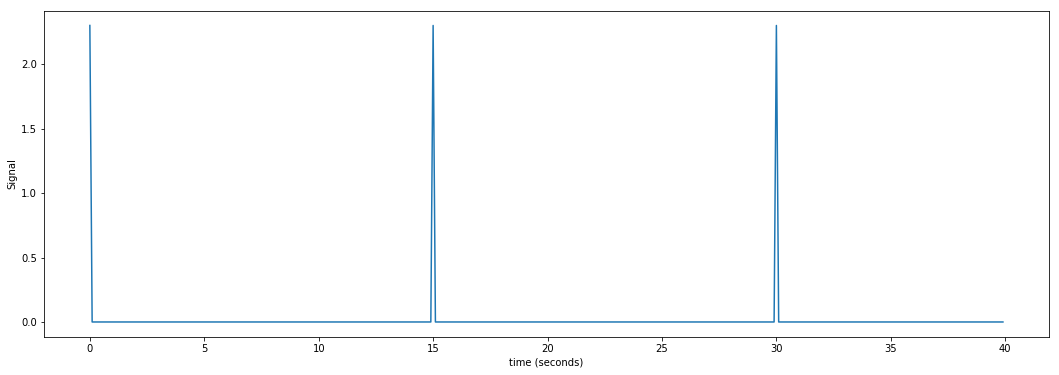

In [7]:
times = np.arange(0, 40, 0.1)
n_time_points = len(times)
jitter_signal = np.zeros(n_time_points)

T = 2.3
period = 150
jitter_signal[::(period)] = T
plt.plot(times, jitter_signal)
plt.xlabel('time (seconds)')
plt.ylabel('Signal')


In [9]:
jitter_signal[:5] #The first five entries

array([2.3, 0. , 0. , 0. , 0. ])

Text(0.5, 1.0, 'Jitter smodel for very brief event at time 4')

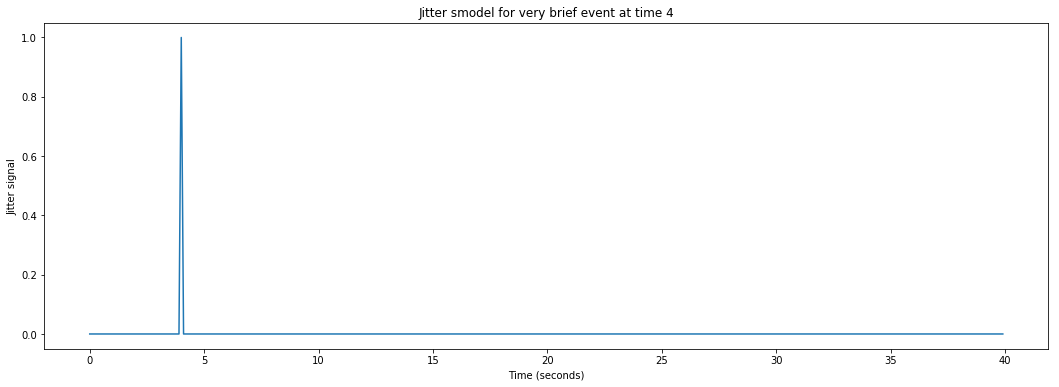

In [57]:
#The impulse response
jitter_signal = np.zeros(n_time_points)
i_time_4 = np.where(times == 4)[0][0]
jitter_signal[i_time_4] = 1
plt.plot(times, jitter_signal)
plt.xlabel('Time (seconds)')
plt.ylabel('Jitter signal')
plt.title('Jitter smodel for very brief event at time 4')

In [21]:
#jitter_signal

In [19]:
'''def expo(peak,t,n):
    #n = 39
    decay = 0.06
    
    return peak * ((1 - decay)**(t*n))
'''

In [58]:
#plt.plot(np.arange(0,len(times)), expo(600, 10, times))

In [23]:
#expo(600,10,times)

In [34]:
def exp(n):
    #Exponential decay function
    
    decay = 0.06
    peak = 300
    t = 10
    
    return peak * ((1 - decay)**(t*n))

Text(0.5, 1.0, 'Single exponential curve at time 0')

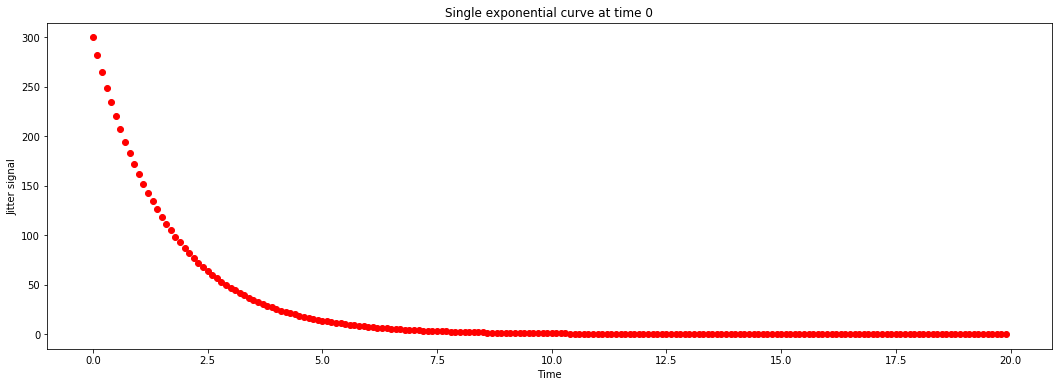

In [60]:
exp_times = np.arange(0,20,0.1)

exp_signal = exp(exp_times)
plt.plot(exp_times, exp_signal, 'ro')
plt.xlabel('Time')
plt.ylabel('Jitter signal')
plt.title('Single exponential curve at time 0')

We take the exponential curve (for an impulse starting at time 0), and shift it by 4 seconds-worth

Text(0.5, 1.0, 'Est. jitter signal for event at time=4')

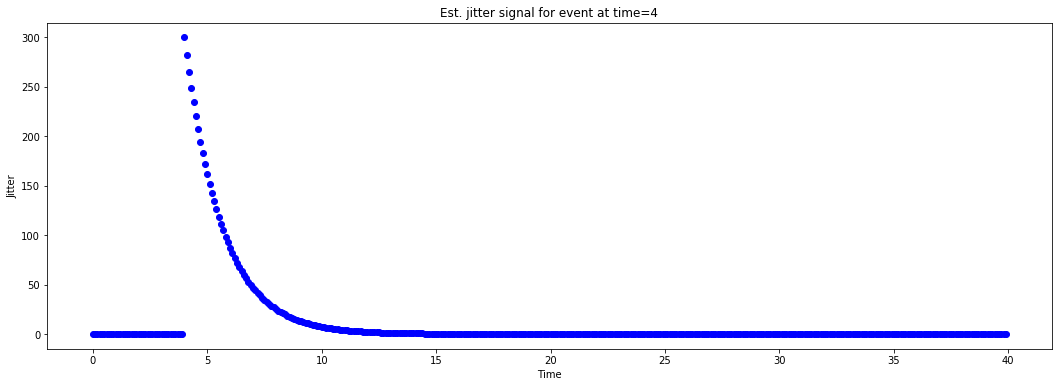

In [36]:
n_exp_points = len(exp_signal)
jitter = np.zeros(n_time_points)
jitter[i_time_4:i_time_4 + n_exp_points] = exp_signal
plt.plot(times,jitter,'bo')
plt.xlabel('Time')
plt.ylabel('Jitter')
plt.title('Est. jitter signal for event at time=4')

Our impulse so far has an amplitude of 1. What if the impulse was twice as strong, with an amplitude of 2? 

Text(0.5, 1.0, 'Jitter model for amplitude 2 impulse')

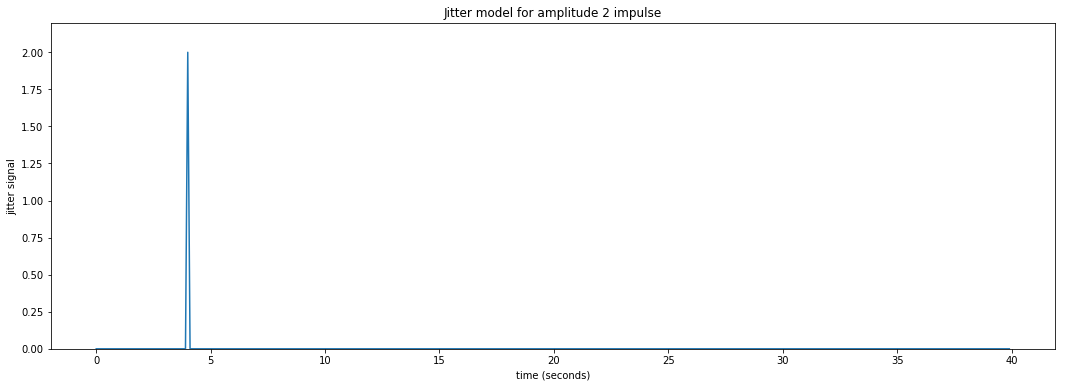

In [37]:
jitter_signal[i_time_4] = 2  # An impulse with amplitude 2
plt.plot(times, jitter_signal)

plt.xlabel('time (seconds)')
plt.ylabel('jitter signal')
plt.ylim(0, 2.2)
plt.title('Jitter model for amplitude 2 impulse')

Maybe I can make the assumption that, if the impulse is twice as large then the response will be twice as large. This is the assumption that the response scales linearly with the impulse.

Now I can predict the output for an impulse of amplitude 2 by taking my exponential curve (exp), shifting by 4, as before, and then multiplying the exp by 2:

Text(0.5, 1.0, 'Output JITTER signal for amplitude 2 impulse')

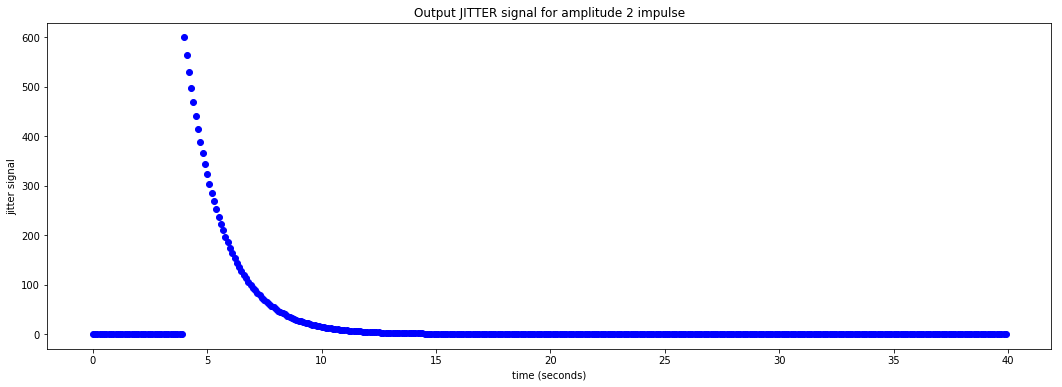

In [42]:
jitter = np.zeros(n_time_points)
jitter[i_time_4:i_time_4 + n_exp_points] = exp_signal * 2
plt.plot(times, jitter,'bo')
plt.xlabel('time (seconds)')
plt.ylabel('jitter signal')
plt.title('Output JITTER signal for amplitude 2 impulse')


What if I have several impulses? For example, imagine I had an impulse amplitude 2 at time == 4, then another of amplitude 1 at time == 10, and another of amplitude 3 at time == 20.

Text(0.5, 1.0, 'Jitter model for three impulses')

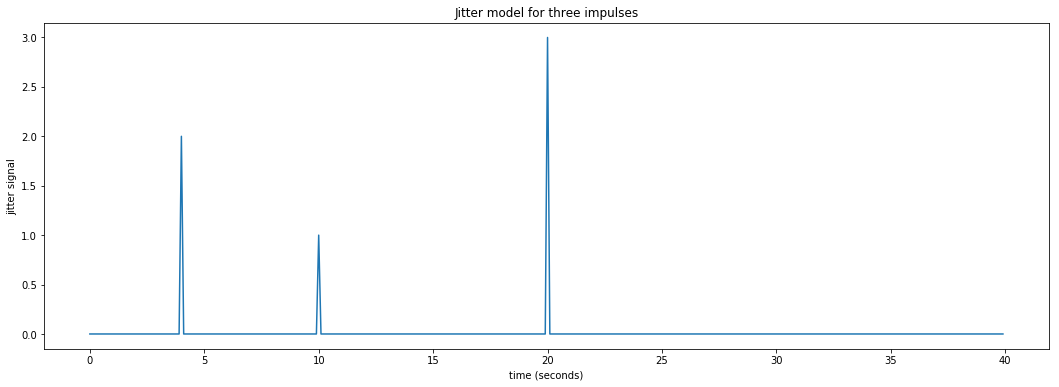

In [43]:
jitter_signal[i_time_4] = 2 # An impulse with amplitude 2
i_time_10 = np.where(times == 10)[0][0] # index of value 10 in "times"
jitter_signal[i_time_10] = 1 # An impulse with amplitude 1
i_time_20 = np.where(times == 20)[0][0] # index of value 20 in "times"
jitter_signal[i_time_20] = 3  # An impulse with amplitude 3
plt.plot(times,jitter_signal)

plt.xlabel('time (seconds)')
plt.ylabel('jitter signal')
#plt.ylim(0, 2.2)
plt.title('Jitter model for three impulses')

Maybe I can also make the assumption that the response to an impulse will be exactly the same over time. The response to any given impulse at time 10 will be the same as the response to the same impulse at time 4 or at time 30.

In that case my job is still simple. For the impulse amplitude 2 at time == 4, I add the exp shifted to start at time == 4, and scaled by 2. To that result I then add the exp shifted to time == 10 and scaled by 1. Finally, I further add the exp shifted to time == 20 and scaled by 3:

Text(0.5, 1.0, 'Jitter output signal for three impulses')

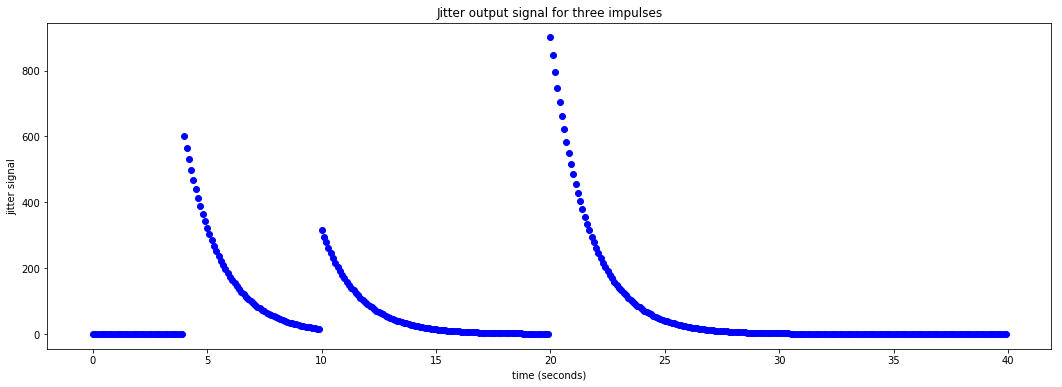

In [47]:
jitter = np.zeros(n_time_points)
jitter[i_time_4:i_time_4 + n_exp_points] = exp_signal * 2
jitter[i_time_10:i_time_10 + n_exp_points] += exp_signal * 1
jitter[i_time_20:i_time_20 + n_exp_points] += exp_signal * 3
plt.plot(times,jitter,'bo')

plt.xlabel('time (seconds)')
plt.ylabel('jitter signal')
#plt.ylim(0, 2.2)
plt.title('Jitter output signal for three impulses')

At the moment, an impulse is an event that lasts for just one time point. In our case, the time vector (times in the code above) has one point for every 0.1 seconds (10 time points per second).

What happens if an event lasts for 0.5 seconds? Maybe I can assume that an event lasting 0.5 seconds has exactly the same effect as 5 impulses 0.1 seconds apart:

Text(0.5, 1.0, 'Jitter model including event lasting 0.5 seconds')

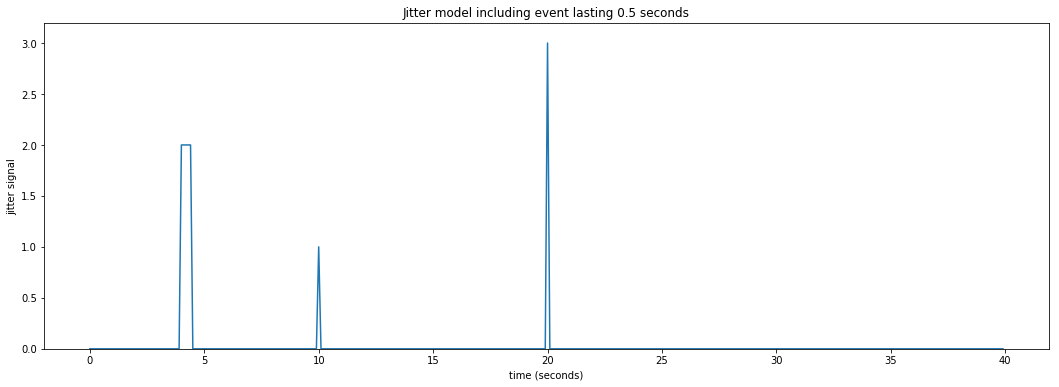

In [48]:
jitter_signal[i_time_4:i_time_4 + 5] = 2
plt.plot(times, jitter_signal)
plt.xlabel('time (seconds)')
plt.ylabel('jitter signal')
plt.ylim(0, 3.2)
plt.title('Jitter model including event lasting 0.5 seconds')

Now I need to add a new shifted exp for the impulse corresponding to time == 4, and for time == 4.1 and so on until time == 4.4:

Text(0.5, 1.0, 'Output JITTER signal with event lasting 0.5 seconds')

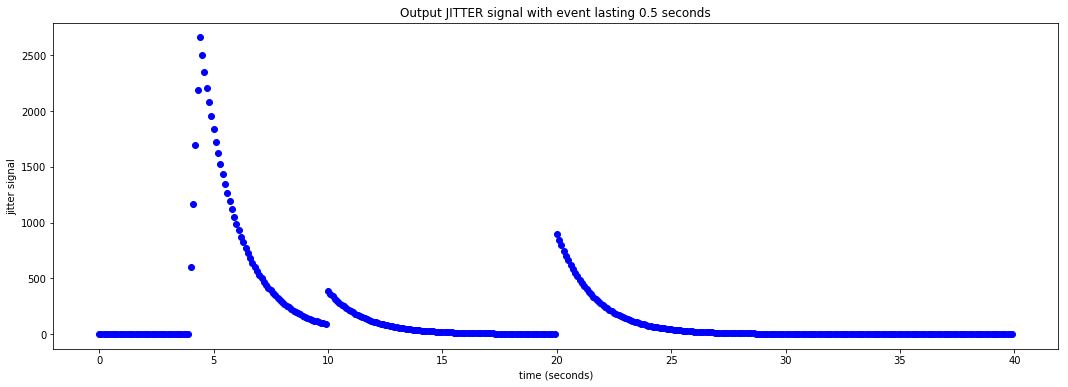

In [50]:
jitter = np.zeros(n_time_points)
for i in range(5):
    jitter[i_time_4 + i:i_time_4  + i + n_exp_points] += exp_signal * 2
jitter[i_time_10:i_time_10 + n_exp_points] += exp_signal * 1
jitter[i_time_20:i_time_20 + n_exp_points] += exp_signal * 3
plt.plot(times, jitter,'bo')
plt.xlabel('time (seconds)')
plt.ylabel('jitter signal')
plt.title('Output JITTER signal with event lasting 0.5 seconds')


## Working out an algorithm

Now we have a general algorithm for making our output exponential signals from our input jitter impulse signals:

(1) Start with an output vector that is a vector of zeros;

(2) For each index i in the input vector (the jitter impulse signal):

(3) Prepare a shifted copy of the EXP vector, starting at i. Call this the shifted EXP vector;

(4) Multiply the shifted EXP vector by the value in the input at index i, to give the shifted, scaled EXP vector;

(5) Add the shifted scaled EXP vector to the output.

There is a little problem with our algorithm — the length of the output vector.

Imagine that our input (impulse) vector is N time points long. Say the original EXP vector is M time points long.

In our algorithm, when the iteration gets to the last index of the input vector (i=N−1), the shifted scaled EXP vector will, as ever, be M points long. If the output vector is the same length as the input vector, we can add only the first point of the new scaled EXP vector to the last point of the output vector, but all the subsequent values of the scaled EXP vector extend off the end of the output vector and have no corresponding index in the output. The way to solve this is to extend the output vector by the necessary M-1 points. 

In signal processing, the Dirac function can be used for sampling a function or alternatively could be used to achieve periodicity in a signal.

For some function f that lives on [0,1] i.e. the function f is zero for all regions outside the unit interval. The convolution of the function f with the Dirac function defined above is f(t – kT), i.e. a copy of f shifted over to live on the interval [n, n+1] (replacing kT with n). So by taking the convolution of some signal with the Dirac function, we create copies of the function f over the real number; we have turned the function f into a periodic function.

In our case, we need to compute the convolution of our input jitter impulses and our function exp that generates a single exponential curve to obtain a periodic version of our function.

Now we can do our algorithm in code.

Text(0.5, 1.0, 'Output JITTER signal using our algorithm')

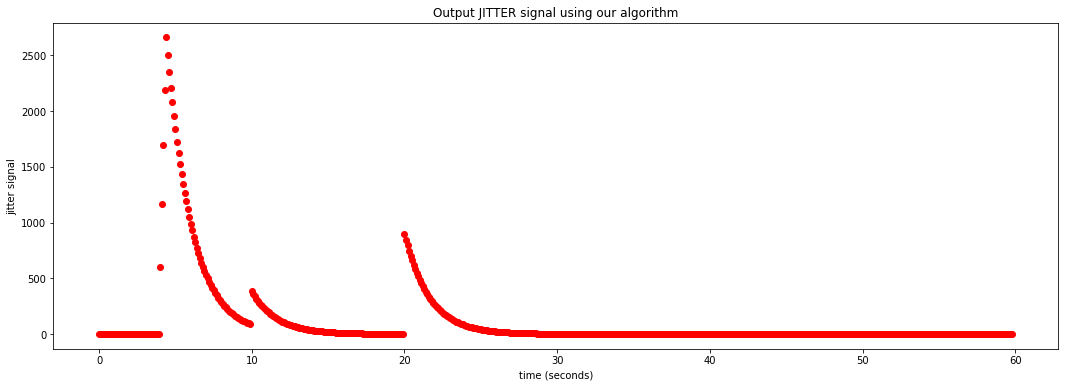

In [53]:
N = n_time_points
M = n_exp_points
jitter = np.zeros(N + M - 1)  # adding the tail

for i in range(N):
    input_value = jitter_signal[i]
    # Adding the shifted, scaled EXP
    jitter[i : i + n_exp_points] += exp_signal * input_value
    # We have to extend 'times' to deal with more points in 'jitter' 
    
extra_times = np.arange(n_exp_points - 1) * 0.1 + 40
times_and_tail = np.concatenate((times, extra_times))
plt.plot(times_and_tail, jitter, 'ro')

plt.xlabel('time (seconds)')

plt.ylabel('jitter signal')

plt.title('Output JITTER signal using our algorithm')


## We have convolution
We now have — convolution. Here’s the same thing using the numpy convolve function:

Text(0.5, 1.0, 'Our algorithm is the same as in-built numpy convolution with our dirac impulses')

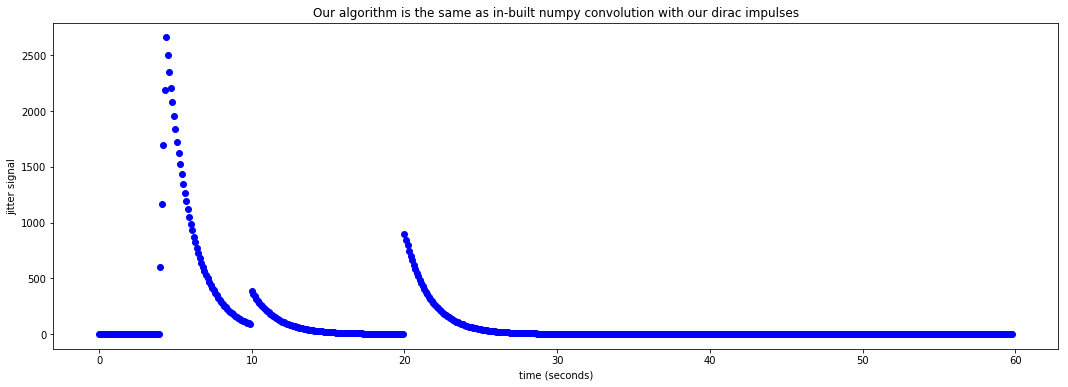

In [55]:
jitter_np = np.convolve(jitter_signal, exp_signal)
plt.plot(times_and_tail, jitter_np,'bo')
plt.xlabel('time (seconds)')
plt.ylabel('jitter signal')
plt.title('Our algorithm is the same as in-built numpy convolution with our dirac impulses')